In [6]:
import uuid

import numpy as np
import matplotlib.pyplot as plt

In [7]:
all_possibilities = frozenset(range(1, 10))

class cell:
    def __init__(self, value):
        self._value         = value.value if isinstance(value, cell) else value
        self._possibilities = set() if self._value > 0 else set(all_possibilities)
        self._hash          = int(uuid.uuid4())

    @property
    def value(self): return self._value
    
    @property
    def possibilities(self): return self._possibilities
    
    def remove(self, values):
        self._possibilities -= set(values)

    def fix(self, value):
        if self.is_fixed(): raise RuntimeError("Value already fixed")
        self._value         = value
        self._possibilities = set()

    def is_fixed(self):
        return self.possibilities == set()

    def __hash__(self):
        return self._hash
    
    def __eq__(self, other):
        return self.value == other.value

    def __str__(self):
        return str(self.value)
    
    def __repr__(self):
        return f"Cell with value: {self.value}; Possibilities: {self.possibilities}"
    
def empty():
    return np.array([[cell(0) for i in range(9)] for j in range(9)], dtype=object)

def sudoku(array):
    sdk = np.array([[cell(value) for value in row] for row in array], dtype=object)
    return sdk

def already_set(seq):
    return set(filter(cell.is_fixed, seq))

def update_possibilities(sdk):
    for i in range(9):
        i_s = i // 3
        for j in range(9):
            j_s = j // 3
            nonvalid  = set(cell.value for cell in sdk[i, :])
            nonvalid |= set(cell.value for cell in sdk[:, j])
            nonvalid |= set(cell.value for cell in sdk[3*i_s : 3*i_s + 3, 3*j_s : 3*j_s + 3].flatten())
            sdk[i, j].remove(nonvalid)


def fix_values_0th_order(sdk0):
    sdk = sdk0.copy()
    for i in range(9):
        for j in range(9):
            cell = sdk[i, j]
#            print(i, j, cell.is_fixed(), cell.possibilities)
#            if cell.is_fixed(): continue
            if len(cell.possibilities) == 1: cell.fix(next(iter(cell.possibilities)))
    return sdk

def plot_grid():
    r      = np.linspace(0, 90, 100)
    n      = lambda x: np.full(100, x)

    for i in range(0, 100, 10): plt.plot(n(i), r, "k", lw=3 if not i % 3 else 1)
    for j in range(0, 100, 10): plt.plot(r, n(j), "k", lw=3 if not j % 3 else 1)


def display(array, array0=None):
    fig    = plt.figure(figsize=(8, 8))
    comp   = array0 is not None
    array  = array [::-1].T
    array0 = array0[::-1].T if comp else empty()

    plot_grid()
    for i in range(9):
        for j in range(9):
            if array[i, j].value == 0: continue
            color = "r" if comp and array[i, j].value != array0[i, j].value else "k"
            plt.text(10*i + 5, 10*j + 5, array[i, j].value, ha = "center", va = "center", fontsize=15, color=color)
    plt.axis("off")

In [8]:
easy0 = sudoku([
[2, 0, 0,   4, 6, 0,   0, 8, 0],
[8, 9, 7,   0, 0, 0,   0, 0, 0],
[0, 3, 0,   0, 0, 1,   9, 0, 0],

[0, 0, 2,   9, 4, 6,   3, 0, 0],
[5, 0, 3,   2, 0, 7,   8, 0, 4],
[0, 0, 1,   3, 8, 5,   2, 0, 0],

[0, 0, 9,   6, 0, 0,   0, 3, 0],
[0, 0, 0,   0, 0, 0,   4, 7, 9],
[0, 5, 0,   0, 9, 3,   0, 0, 2]
])

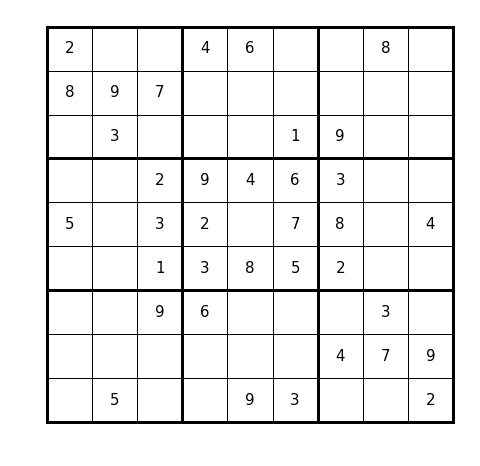

In [9]:
display(easy0)

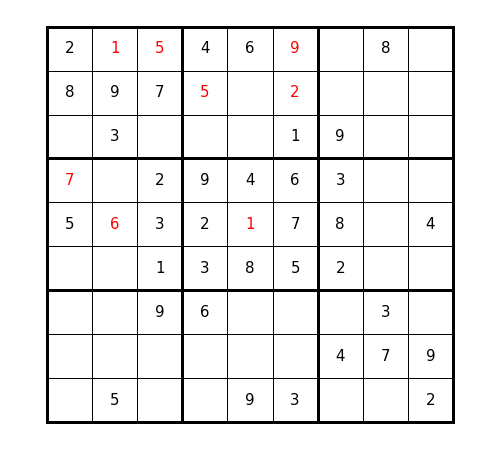

>


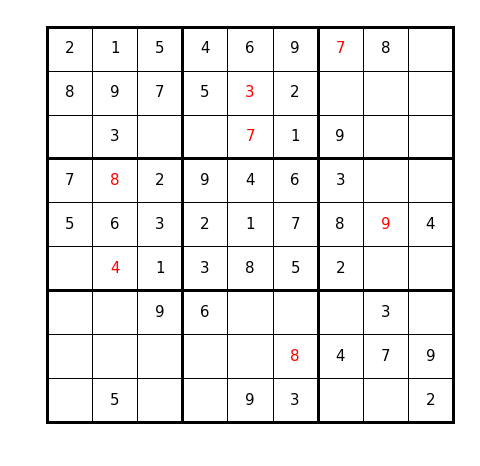

>


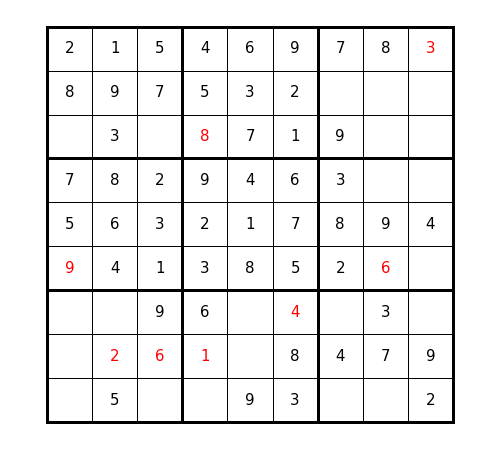

>


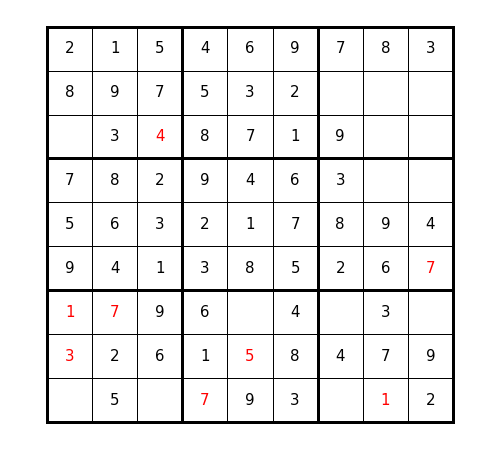

>


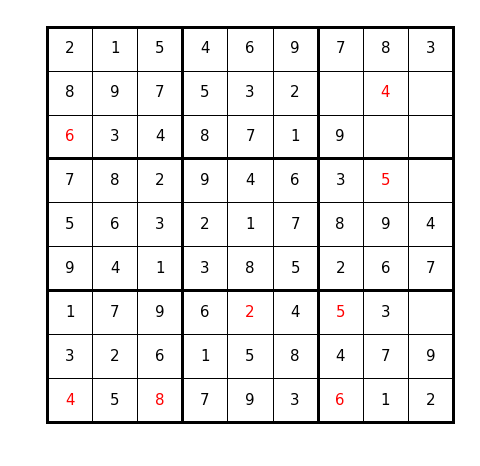

>


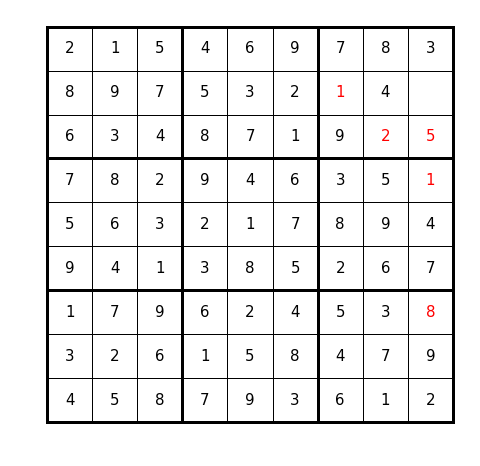

>


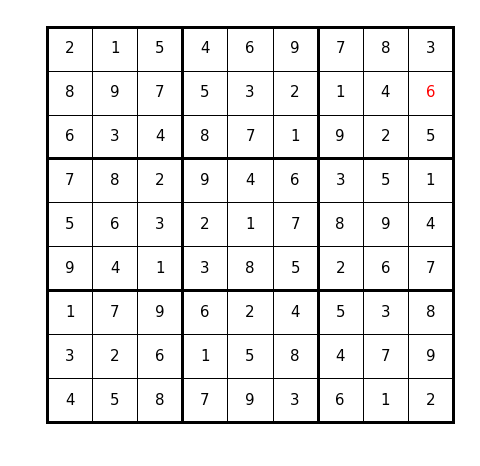

>


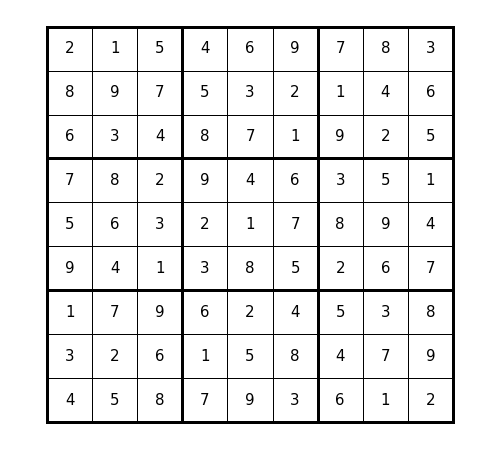

>


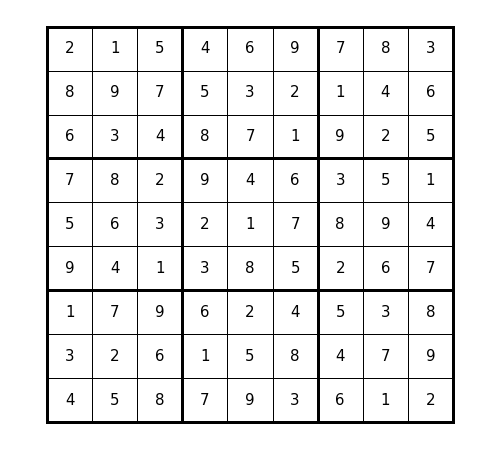

KeyboardInterrupt: 

In [10]:
easy1 = sudoku(easy0)
while True:
    easy2 = sudoku(easy1)
    update_possibilities(easy2)
    easy2 = fix_values_0th_order(easy2)
    display(easy2, easy1)
    plt.show()
    input(">")
    easy1 = easy2